  VendorName ModelName  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP
0    adviser     32/60   125   256   6000   256     16    128  198
1     amdahl    470v/7    29  8000  32000    32      8     32  269
2     amdahl   470v/7a    29  8000  32000    32      8     32  220
3     amdahl   470v/7b    29  8000  32000    32      8     32  172
4     amdahl   470v/7c    29  8000  16000    32      8     16  132
              MYCT          MMIN          MMAX        CACH       CHMIN  \
count   209.000000    209.000000    209.000000  209.000000  209.000000   
mean    203.822967   2867.980861  11796.153110   25.205742    4.698565   
std     260.262926   3878.742758  11726.564377   40.628722    6.816274   
min      17.000000     64.000000     64.000000    0.000000    0.000000   
25%      50.000000    768.000000   4000.000000    0.000000    1.000000   
50%     110.000000   2000.000000   8000.000000    8.000000    2.000000   
75%     225.000000   4000.000000  16000.000000   32.000000    6.000000   
max   

<Figure size 1000x800 with 0 Axes>

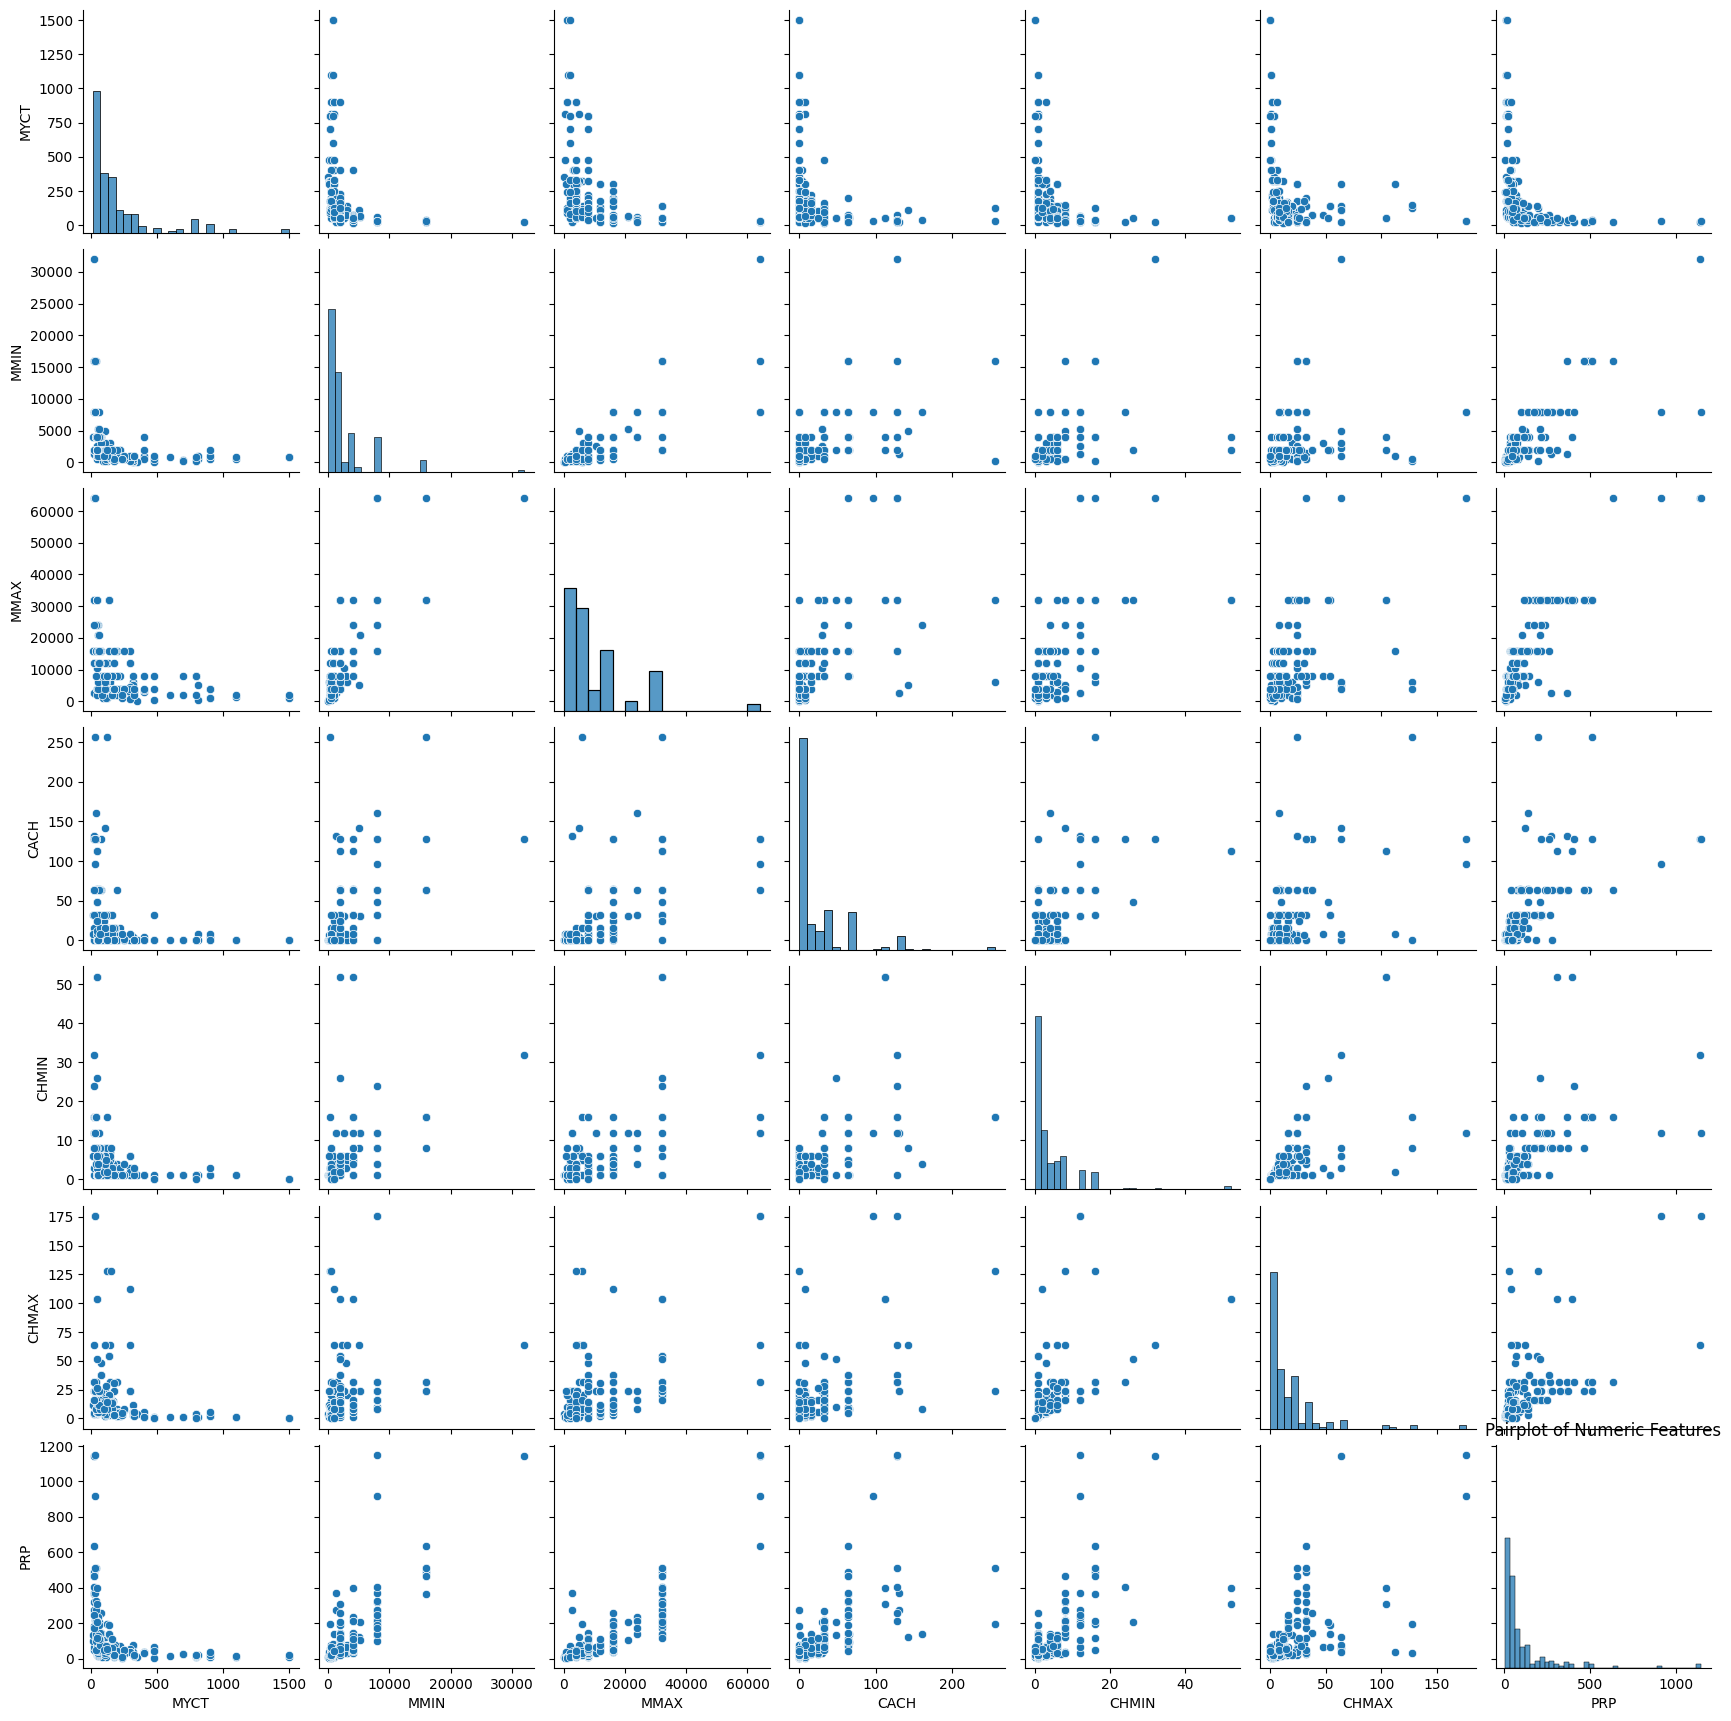

Mean Squared Error: 5633.068155793262
R^2 Score: 0.8893455830696774
Cross-validation scores: [ 0.83594822 -0.09964463  0.86840964  0.84135651  0.63509917]
Mean CV Score: 0.6162337806164521


In [60]:
#4차 프로그래밍과제 (1)번
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 데이터셋 불러오기
data = pd.read_csv("machine.data.csv")

# 데이터 확인
print(data.head())

# 데이터 분포 탐색
print(data.describe())

# 데이터 분포 시각화
plt.figure(figsize=(10, 8))
sns.pairplot(data)
plt.title("Pairplot of Numeric Features")
plt.show()


# 피처 선택
X = data.drop('PRP', axis=1)
y = data['PRP']

# 문자열 데이터가 있는 열 제거
X_numeric = X.select_dtypes(include=[np.number])

# 피처 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 다중 회귀 모델 선택 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 모델 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# 교차 검증
cv_scores = cross_val_score(model, X_scaled, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))





In [43]:
#4차 프로그래밍과제 (2)번

# 훈련 데이터에서의 성능 평가
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print("Training Data Performance:")
print("Mean Squared Error:", train_mse)
print("Mean Absolute Error:", train_mae)
print("R^2 Score:", train_r2)
print("Cross-validation scores:", train_cv_scores)
print("Mean CV Score:", np.mean(train_cv_scores))
print()

# 테스트 데이터에서의 성능 평가
test_mse = mean_squared_error(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)
test_cv_scores = cross_val_score(model, X_test, y_test, cv=5)

print("Test Data Performance:")
print("Mean Squared Error:", test_mse)
print("Mean Absolute Error:", test_mae)
print("R^2 Score:", test_r2)
print("Cross-validation scores:", test_cv_scores)
print("Mean CV Score:", np.mean(test_cv_scores))


Training Data Performance:
Mean Squared Error: 3117.658905430177
Mean Absolute Error: 35.12200634651682
R^2 Score: 0.8378284557995717
Cross-validation scores: [0.63828223 0.44329768 0.45334519 0.85890627 0.86028105]
Mean CV Score: 0.6508224821731219

Test Data Performance:
Mean Squared Error: 5633.068155793262
Mean Absolute Error: 48.06880134700473
R^2 Score: 0.8893455830696774
Cross-validation scores: [ 0.6417733   0.54730228 -2.69104075 -0.02871545  0.26838855]
Mean CV Score: -0.2524584146149756


In [53]:
#4차 프로그래밍과제 (3)번

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# 파이프라인 생성
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# 탐색할 하이퍼파라미터 그리드
param_grid = {
    'regressor__fit_intercept': [True, False]  # 절편 학습 여부
}

# GridSearchCV를 사용하여 최적의 모델 찾기
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# 최적의 모델과 파라미터 출력
print("Best Estimator:", grid_search.best_estimator_)
print("Best Parameters:", grid_search.best_params_)

# 테스트 데이터에서의 예측 성능 평가
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
r2_best = r2_score(y_test, y_pred_best)
print("Best Model R^2 Score on Test Data:", r2_best)



Best Estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])
Best Parameters: {'regressor__fit_intercept': True}
Best Model R^2 Score on Test Data: 0.8893455830696775


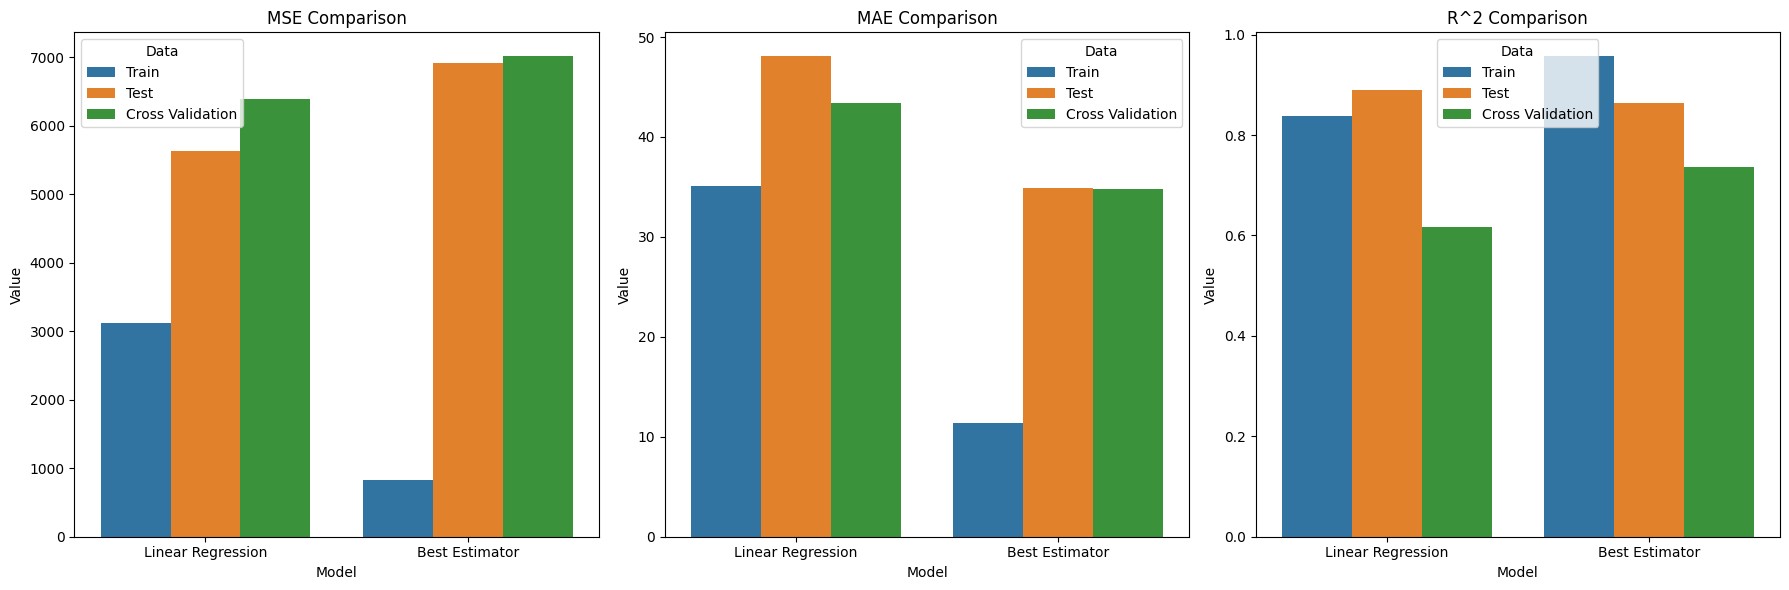

               Model              Data          MSE        MAE       R^2
0  Linear Regression             Train  3117.658905  35.122006  0.837828
1  Linear Regression              Test  5633.068156  48.068801  0.889346
2     Best Estimator             Train   831.768694  11.397357  0.956734
3     Best Estimator              Test  6913.951976  34.921398  0.864184
4  Linear Regression  Cross Validation  6383.656697  43.378262  0.616234
5     Best Estimator  Cross Validation  7011.315337  34.800273  0.735967


In [52]:
#4차 프로그래밍과제 (4)번
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# 데이터셋 로드
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data'
column_names = ['vendor_name', 'model_name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']
data = pd.read_csv(url, names=column_names)

# 필요없는 열 제거
data = data.drop(['vendor_name', 'model_name', 'ERP'], axis=1)

# 데이터 정규화
scaler = StandardScaler()
X = data.drop('PRP', axis=1)
X = scaler.fit_transform(X)
y = data['PRP']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 선형 회귀 모델 예측 및 평가
y_pred_train_lr = lr_model.predict(X_train)
y_pred_test_lr = lr_model.predict(X_test)
mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
mae_train_lr = mean_absolute_error(y_train, y_pred_train_lr)
r2_train_lr = r2_score(y_train, y_pred_train_lr)
mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)
mae_test_lr = mean_absolute_error(y_test, y_pred_test_lr)
r2_test_lr = r2_score(y_test, y_pred_test_lr)

# 선형 회귀 모델 교차 검증
cv_results_lr = cross_validate(lr_model, X, y, cv=5, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
cv_mse_lr = -cv_results_lr['test_neg_mean_squared_error'].mean()
cv_mae_lr = -cv_results_lr['test_neg_mean_absolute_error'].mean()
cv_r2_lr = cv_results_lr['test_r2'].mean()

# 랜덤 포레스트 모델 훈련 (최적 모델)
rf_model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_

# 랜덤 포레스트 모델 예측 및 평가
y_pred_train_rf = best_rf_model.predict(X_train)
y_pred_test_rf = best_rf_model.predict(X_test)
mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
mae_train_rf = mean_absolute_error(y_train, y_pred_train_rf)
r2_train_rf = r2_score(y_train, y_pred_train_rf)
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)
mae_test_rf = mean_absolute_error(y_test, y_pred_test_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

# 랜덤 포레스트 모델 교차 검증
cv_results_rf = cross_validate(best_rf_model, X, y, cv=5, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'])
cv_mse_rf = -cv_results_rf['test_neg_mean_squared_error'].mean()
cv_mae_rf = -cv_results_rf['test_neg_mean_absolute_error'].mean()
cv_r2_rf = cv_results_rf['test_r2'].mean()

# 시각화를 위한 데이터 준비
performance_data = pd.DataFrame({
    'Model': ['Linear Regression'] * 6 + ['Best Estimator'] * 6,
    'Data': ['Train', 'Train', 'Train', 'Test', 'Test', 'Test'] * 2,
    'Metric': ['MSE', 'MAE', 'R^2', 'MSE', 'MAE', 'R^2'] * 2,
    'Value': [
        mse_train_lr, mae_train_lr, r2_train_lr, mse_test_lr, mae_test_lr, r2_test_lr,
        mse_train_rf, mae_train_rf, r2_train_rf, mse_test_rf, mae_test_rf, r2_test_rf
    ]
})

cv_data = pd.DataFrame({
    'Model': ['Linear Regression', 'Linear Regression', 'Linear Regression', 'Best Estimator', 'Best Estimator', 'Best Estimator'],
    'Data': ['Cross Validation'] * 6,
    'Metric': ['MSE', 'MAE', 'R^2', 'MSE', 'MAE', 'R^2'],
    'Value': [cv_mse_lr, cv_mae_lr, cv_r2_lr, cv_mse_rf, cv_mae_rf, cv_r2_rf]
})

performance_data = pd.concat([performance_data, cv_data], ignore_index=True)

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(x='Model', y='Value', hue='Data', data=performance_data[performance_data['Metric'] == 'MSE'], ax=axes[0])
axes[0].set_title('MSE Comparison')

sns.barplot(x='Model', y='Value', hue='Data', data=performance_data[performance_data['Metric'] == 'MAE'], ax=axes[1])
axes[1].set_title('MAE Comparison')

sns.barplot(x='Model', y='Value', hue='Data', data=performance_data[performance_data['Metric'] == 'R^2'], ax=axes[2])
axes[2].set_title('R^2 Comparison')

plt.tight_layout()
plt.show()

# 성능 지표 출력
performance_table = pd.DataFrame({
    'Model': ['Linear Regression', 'Linear Regression', 'Best Estimator', 'Best Estimator', 'Linear Regression', 'Best Estimator'],
    'Data': ['Train', 'Test', 'Train', 'Test', 'Cross Validation', 'Cross Validation'],
    'MSE': [mse_train_lr, mse_test_lr, mse_train_rf, mse_test_rf, cv_mse_lr, cv_mse_rf],
    'MAE': [mae_train_lr, mae_test_lr, mae_train_rf, mae_test_rf, cv_mae_lr, cv_mae_rf],
    'R^2': [r2_train_lr, r2_test_lr, r2_train_rf, r2_test_rf, cv_r2_lr, cv_r2_rf]
})
print(performance_table)
